In [179]:
# Main libraries
import os
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
import seaborn as sns
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Deactivate warnings
import warnings
warnings.filterwarnings("ignore")

# Metrics
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Modelling libraries
from sklearn.model_selection import train_test_split

from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV

import pickle

In [2]:
model_Elastic = ElasticNet()
model_Lasso = Lasso()
model_Ridge = Ridge()
model_Linear = LinearRegression()
model_SVR = SVR()
model_Gradient = GradientBoostingRegressor()
model_Random = RandomForestRegressor(
  max_depth=10,
  min_samples_leaf=1,
  min_samples_split=10,
  n_estimators=300,
  random_state=42)
model_Decision = DecisionTreeRegressor()
model_Cat = CatBoostRegressor()
model_LGBMRegressor = LGBMRegressor()
model_XGBRegressor = XGBRegressor()
model_KNeighbors = KNeighborsRegressor()

models = [
  model_Elastic,
  model_Lasso,
  model_Ridge,
  model_Linear,
  model_SVR,
  model_Gradient,
  model_Random,
  model_Decision,
  model_Cat,
  model_LGBMRegressor,
  model_XGBRegressor,
  model_KNeighbors
]

 Table

# Instructions

1. Load the `train.csv` file
2. Explore the data, understand it
3. Process it for future training
4. Do train, test, split for your `train.csv` file
5. `fit/train` a model from your cleaned_train_df
-----
5. Load the `test.csv` file
6. Apply the same processing you did to `train.csv` into `test.csv`
7. `predict` the price for that file
8. Only keep the columns you need
9. Export
-----
10. Repeat! 🚀🔥

# Import the csv files

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [5]:
df_train["cut"].value_counts()
# easily make numerical (less to higer value) (Fair, Good, Very Good, Premium, Ideal)

cut
Ideal        16210
Premium      10296
Very Good     9080
Good          3673
Fair          1196
Name: count, dtype: int64

In [6]:
df_train["color"].value_counts()
# easily make numerical (less to higer value) (J, I, H, G, F, E, D)


color
G    8530
E    7352
F    7168
H    6232
D    5102
I    3984
J    2087
Name: count, dtype: int64

In [7]:
df_train["clarity"].value_counts()
# easily make numerical from lower to higer clarity (less to higer value) (SI2, SI1, VS2, VS1, VVS2, VVS1, IF, I1 = FL)

clarity
SI1     9861
VS2     9196
SI2     6844
VS1     6073
VVS2    3848
VVS1    2729
IF      1367
I1       537
Name: count, dtype: int64

<Axes: >

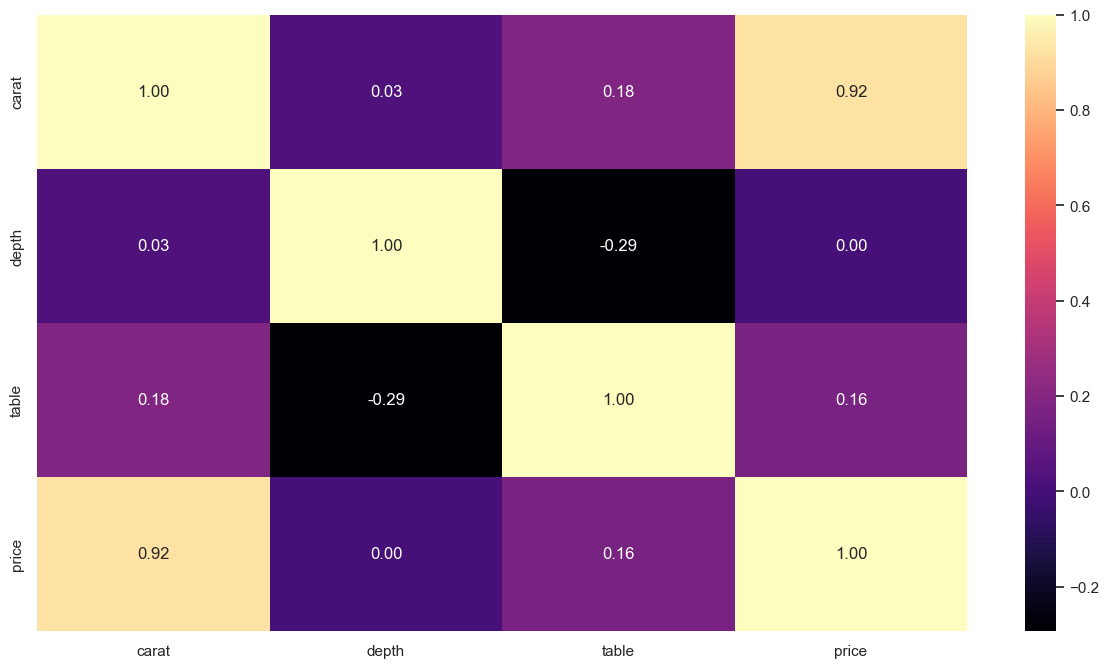

In [8]:
df_numerical = df_train[["carat",	"depth", "table", "price"]]
sns.heatmap(df_numerical.corr(), annot=True, cmap='magma', fmt='.2f')

In [9]:
df_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
13260,13260,0.61,Premium,F,VVS1,61.8,59.0,5.48,5.4,3.36,7.92


In [10]:
df_test.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z
7198,7198,0.32,Premium,J,SI1,62.2,59.0,4.41,4.37,2.73


In [11]:
df_train.shape

(40455, 11)

In [12]:
df_test.shape

(13485, 10)

In [13]:
df_train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
df_test.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [15]:
#SUBMISSION -> test

In [16]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
8668,8668,1.08,Premium,H,VS2,62.4,58.0,6.56,6.49,4.07


In [17]:
df_train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [77]:
def process_diamond_dataset_label(df):

  df = df.drop(columns=["x", "y", "z", "id"])

  cut_dict = {"Fair": 1, "Good": 2, "Very Good": 3,"Premium": 4, "Ideal": 5}
  df["cut"] = df["cut"].replace(cut_dict)
  
  color_dict = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
  df["color"] = df["color"].replace(color_dict)

  clarity_dict = {"SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7, "I1": 8}
  df["clarity"] = df["clarity"].replace(clarity_dict)

  return df


def process_diamond_dataset_one_hot(df):
    df = df.drop(columns=["x", "y", "z", "id"])

    df = pd.get_dummies(df, columns=["cut", "color", "clarity"], drop_first=True)

    return df


In [19]:
df_train_cleaned_label = process_diamond_dataset_label(df_train)
df_train_cleaned_label.info()
df_train_cleaned_label.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  int64  
 2   color    40455 non-null  int64  
 3   clarity  40455 non-null  int64  
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 2.2 MB


,carat,cut,color,clarity,depth,table,price
14155,0.7,4,6,2,62.9,58.0,7.755


In [20]:
df_train_cleaned_one_hot = process_diamond_dataset_one_hot(df_train)
df_train_cleaned_one_hot.info()
df_train_cleaned_one_hot.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          40455 non-null  float64
 1   depth          40455 non-null  float64
 2   table          40455 non-null  float64
 3   price          40455 non-null  float64
 4   cut_Good       40455 non-null  bool   
 5   cut_Ideal      40455 non-null  bool   
 6   cut_Premium    40455 non-null  bool   
 7   cut_Very Good  40455 non-null  bool   
 8   color_E        40455 non-null  bool   
 9   color_F        40455 non-null  bool   
 10  color_G        40455 non-null  bool   
 11  color_H        40455 non-null  bool   
 12  color_I        40455 non-null  bool   
 13  color_J        40455 non-null  bool   
 14  clarity_IF     40455 non-null  bool   
 15  clarity_SI1    40455 non-null  bool   
 16  clarity_SI2    40455 non-null  bool   
 17  clarity_VS1    40455 non-null  bool   
 18  clarit

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
35363,1.24,60.2,63.0,9.149,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# Cleaning, processing, feature selection, etc

# Train on train.csv

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg)

## Train, test split

In [190]:
X = df_train_cleaned_label.drop(columns=["price"])
y = df_train_cleaned_label['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [191]:
results_label = {}
for model in models:
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    rmse = np.sqrt(mse)
    
    model_name = type(model).__name__
    results_label[model_name] = {'RMSE': rmse, 'R2': r2}
    

    if model is model_Gradient:
        with open('best_model_gradient_noPoly.pkl', 'wb') as file:
            pickle.dump(model, file)
    if model is model_Cat:
        with open('best_model_catBoostRegressor_noPoly.pkl', 'wb') as file:
            pickle.dump(model, file)
    if model is model_Lasso:
        with open('best_model_lasso.pkl', 'wb') as file:
            pickle.dump(model, file)
    if model is model_Linear:
        with open('best_model_lineReg.pkl', 'wb') as file:
            pickle.dump(model, file)
    if model is model_Elastic:
        with open('best_model_elastic.pkl', 'wb') as file:
            pickle.dump(model, file)
    if model is model_Ridge:
        with open('best_model_ridge.pkl', 'wb') as file:
            pickle.dump(model, file)
    

results_label

Learning rate set to 0.068631
0:	learn: 0.9491886	total: 4.45ms	remaining: 4.45s
1:	learn: 0.8910239	total: 7.81ms	remaining: 3.9s
2:	learn: 0.8365627	total: 11.1ms	remaining: 3.7s
3:	learn: 0.7848654	total: 15.7ms	remaining: 3.91s
4:	learn: 0.7367351	total: 19.1ms	remaining: 3.8s
5:	learn: 0.6927188	total: 22.3ms	remaining: 3.7s
6:	learn: 0.6523405	total: 25.9ms	remaining: 3.67s
7:	learn: 0.6152395	total: 30.1ms	remaining: 3.73s
8:	learn: 0.5798880	total: 33.3ms	remaining: 3.67s
9:	learn: 0.5472876	total: 36.8ms	remaining: 3.64s
10:	learn: 0.5160883	total: 40.3ms	remaining: 3.62s
11:	learn: 0.4876902	total: 43.7ms	remaining: 3.6s
12:	learn: 0.4612682	total: 55ms	remaining: 4.18s
13:	learn: 0.4360627	total: 58.2ms	remaining: 4.1s
14:	learn: 0.4133166	total: 62.3ms	remaining: 4.09s
15:	learn: 0.3927987	total: 65.5ms	remaining: 4.03s
16:	learn: 0.3732872	total: 69.3ms	remaining: 4.01s
17:	learn: 0.3545531	total: 72.8ms	remaining: 3.97s
18:	learn: 0.3376365	total: 77ms	remaining: 3.98s
19

{'ElasticNet': {'RMSE': 1.0163839708093352, 'R2': -9.290413406937148e-05},
 'Lasso': {'RMSE': 1.0163839708093352, 'R2': -9.290413406937148e-05},
 'Ridge': {'RMSE': 0.3643531759767789, 'R2': 0.8714802564186813},
 'LinearRegression': {'RMSE': 0.3643456117062326, 'R2': 0.8714855927137032},
 'SVR': {'RMSE': 0.4012256978899433, 'R2': 0.8441516482205623},
 'GradientBoostingRegressor': {'RMSE': 0.11104221119976818,
  'R2': 0.9880628422233614},
 'RandomForestRegressor': {'RMSE': 0.11093562939032475,
  'R2': 0.9880857465454682},
 'DecisionTreeRegressor': {'RMSE': 0.144347394977233,
  'R2': 0.9798282938676481},
 'CatBoostRegressor': {'RMSE': 0.09628925968569373, 'R2': 0.9910240499587905},
 'LGBMRegressor': {'RMSE': 0.09896067485594197, 'R2': 0.9905190899134435},
 'XGBRegressor': {'RMSE': 0.098866365733154, 'R2': 0.9905371518407828},
 'KNeighborsRegressor': {'RMSE': 0.4976996286787902, 'R2': 0.7601943756046345}}

In [184]:
X = df_train_cleaned_label.drop(columns=["price"])
y = df_train_cleaned_one_hot['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [185]:
results_label = {}
for model in models:
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    rmse = np.sqrt(mse)
    
    # Store results
    model_name = type(model).__name__
    results_label[model_name] = {'RMSE': rmse, 'R2': r2}

results_label

Learning rate set to 0.068631
0:	learn: 0.9533609	total: 3.78ms	remaining: 3.77s
1:	learn: 0.8945028	total: 7.01ms	remaining: 3.5s
2:	learn: 0.8387606	total: 10.9ms	remaining: 3.61s
3:	learn: 0.7869444	total: 15.3ms	remaining: 3.8s
4:	learn: 0.7386861	total: 18.5ms	remaining: 3.68s
5:	learn: 0.6948657	total: 21.9ms	remaining: 3.62s
6:	learn: 0.6538436	total: 25.7ms	remaining: 3.64s
7:	learn: 0.6164626	total: 30.1ms	remaining: 3.73s
8:	learn: 0.5812145	total: 34.2ms	remaining: 3.76s
9:	learn: 0.5490674	total: 37.4ms	remaining: 3.71s
10:	learn: 0.5180606	total: 40.8ms	remaining: 3.66s
11:	learn: 0.4894657	total: 45.8ms	remaining: 3.77s
12:	learn: 0.4623070	total: 48.9ms	remaining: 3.71s
13:	learn: 0.4368623	total: 52.2ms	remaining: 3.67s
14:	learn: 0.4138816	total: 55.4ms	remaining: 3.64s
15:	learn: 0.3931131	total: 60.7ms	remaining: 3.73s
16:	learn: 0.3737403	total: 64.1ms	remaining: 3.7s
17:	learn: 0.3551417	total: 67.3ms	remaining: 3.67s
18:	learn: 0.3381230	total: 70.5ms	remaining: 3

{'ElasticNet': {'RMSE': 1.0086812274838772, 'R2': -2.170441412929769e-05},
 'Lasso': {'RMSE': 1.0086812274838772, 'R2': -2.170441412929769e-05},
 'Ridge': {'RMSE': 0.36825644201268104, 'R2': 0.8667085614563397},
 'LinearRegression': {'RMSE': 0.3682584079507072, 'R2': 0.8667071382991202},
 'SVR': {'RMSE': 0.396053139899157, 'R2': 0.8458269475959956},
 'GradientBoostingRegressor': {'RMSE': 0.11167327144736816,
  'R2': 0.9877425529100542},
 'RandomForestRegressor': {'RMSE': 0.11015404504430643,
  'R2': 0.9880737900868757},
 'DecisionTreeRegressor': {'RMSE': 0.14074795094994857,
  'R2': 0.9805291141167962},
 'CatBoostRegressor': {'RMSE': 0.09777066512350809, 'R2': 0.9906045261362117},
 'LGBMRegressor': {'RMSE': 0.10023145010874805, 'R2': 0.9901256259041419},
 'XGBRegressor': {'RMSE': 0.10066002675858242, 'R2': 0.990041002290542},
 'KNeighborsRegressor': {'RMSE': 0.48891336487759485,
  'R2': 0.7650554538961244}}

In [49]:
# Process data
df_train_cleaned_label = process_diamond_dataset_label(df_train)
df_train_cleaned_one_hot = process_diamond_dataset_one_hot(df_train)

# Split data for label encoded dataset
X_label = df_train_cleaned_label.drop(columns=['price'])
y_label = df_train_cleaned_label['price']
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.35)

# Split data for one-hot encoded dataset
X_one_hot = df_train_cleaned_one_hot.drop(columns=['price'])
y_one_hot = df_train_cleaned_one_hot['price']
X_train_one_hot, X_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(X_one_hot, y_one_hot, test_size=0.35)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_label)
X_test_poly = poly.transform(X_test_label)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_label)
X_test_scaled = scaler.transform(X_test_label)

# Hyperparameter Tuning for RandomForestRegressor
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_label, y_train_label)
model_Random = grid_search.best_estimator_

# Evaluation loop for label encoding with polynomial and scaled features
results_label = {}
for model in models:
    if model == model_Random:
        # Use the tuned model
        model.fit(X_train_label, y_train_label)
    else:
        model.fit(X_train_poly, y_train_label)  # Polynomial features
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test_label, y_pred)
    rmse = np.sqrt(mse)
    model_name = type(model).__name__
    results_label[model_name] = {'RMSE': rmse}
    if model is model_Cat:
        with open('best_model_catboost.pkl', 'wb') as file:
            pickle.dump(model, file)
    if model is model_Gradient:
        with open('best_model_gradientboosting.pkl', 'wb') as file:
            pickle.dump(model, file)
    if model is model_LGBMRegressor:
        with open('best_model_LGBMRegressor.pkl', 'wb') as file:
            pickle.dump(model, file)

# Evaluation loop for one-hot encoding
results_one_hot = {}
for model in models:
    model.fit(X_train_one_hot, y_train_one_hot)
    y_pred = model.predict(X_test_one_hot)
    mse = mean_squared_error(y_test_one_hot, y_pred)
    rmse = np.sqrt(mse)
    model_name = type(model).__name__
    results_one_hot[model_name] = {'RMSE': rmse}

# Output the results
print("Label Encoding Results:", results_label)
print("One-hot Encoding Results:", results_one_hot)


Learning rate set to 0.068631
0:	learn: 0.9515997	total: 7.94ms	remaining: 7.94s
1:	learn: 0.8921687	total: 13.3ms	remaining: 6.63s
2:	learn: 0.8363734	total: 20.6ms	remaining: 6.84s
3:	learn: 0.7850527	total: 25.7ms	remaining: 6.41s
4:	learn: 0.7373403	total: 30.9ms	remaining: 6.14s
5:	learn: 0.6931540	total: 37ms	remaining: 6.12s
6:	learn: 0.6522232	total: 42ms	remaining: 5.96s
7:	learn: 0.6143971	total: 47ms	remaining: 5.83s
8:	learn: 0.5781594	total: 54.3ms	remaining: 5.97s
9:	learn: 0.5442072	total: 59.3ms	remaining: 5.87s
10:	learn: 0.5132801	total: 65.6ms	remaining: 5.89s
11:	learn: 0.4849535	total: 72ms	remaining: 5.93s
12:	learn: 0.4583952	total: 78.4ms	remaining: 5.95s
13:	learn: 0.4327379	total: 85.3ms	remaining: 6.01s
14:	learn: 0.4089869	total: 90.8ms	remaining: 5.96s
15:	learn: 0.3868528	total: 97ms	remaining: 5.96s
16:	learn: 0.3665276	total: 104ms	remaining: 6.03s
17:	learn: 0.3479012	total: 109ms	remaining: 5.97s
18:	learn: 0.3305867	total: 116ms	remaining: 6.01s
19:	l

In [97]:
from sklearn.model_selection import GridSearchCV

# Define your parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model for regression
rf = RandomForestRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: -1.0310633066600237


In [81]:
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.81,Ideal,F,SI1,61.5,57.0,6.01,6.06,3.71
1,1,0.50,Fair,F,I1,63.8,58.0,5.08,4.97,3.21
2,2,0.31,Ideal,D,VVS2,60.1,56.0,4.43,4.46,2.67
3,3,1.52,Fair,I,SI2,64.7,58.0,7.19,7.22,4.66
4,4,0.35,Premium,D,VVS1,60.8,58.0,4.55,4.53,2.76
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.52,Ideal,D,VVS2,61.4,56.0,5.23,5.20,3.20
13481,13481,1.01,Very Good,E,VS2,59.3,59.0,6.50,6.56,3.87
13482,13482,1.50,Premium,H,VS2,60.6,61.0,7.34,7.31,4.44
13483,13483,0.40,Ideal,E,VVS2,62.5,54.0,4.75,4.76,2.97


In [142]:
with open('best_model_catboost.pkl', 'rb') as file:
    loaded_model_cat = pickle.load(file)

# Process df_prediction with the same function used for training data
df_prediction_cat = process_diamond_dataset_label(df_test)

# Apply Polynomial Features
df_prediction_poly_cat = poly.transform(df_prediction_cat)

In [143]:
predictions_cat = loaded_model_cat.predict(df_prediction_poly_cat)
predictions_cat = pd.DataFrame(predictions_cat, columns=["price"])
predictions_cat["id"] = predictions_cat.index
predictions_cat = predictions_cat[['id', 'price']]
predictions_cat.to_csv("./predictions_cat_model.csv", index=False)
predictions_cat

,id,price
0,0,8.055477
1,1,6.641023
2,2,6.845552
3,3,8.772805
4,4,7.086595
...,...,...
13480,13480,7.842171
13481,13481,8.800501
13482,13482,9.226760
13483,13483,7.030423


In [144]:
with open('best_model_gradientboosting.pkl', 'rb') as file:
    loaded_model_gradient = pickle.load(file)

# Process df_prediction with the same function used for training data
df_prediction_gradient = process_diamond_dataset_label(df_test)

# Apply Polynomial Features
df_prediction_poly_gradient = poly.transform(df_prediction_gradient)

In [145]:
predictions_gradient = loaded_model_gradient.predict(df_prediction_poly_gradient)
predictions_gradient = pd.DataFrame(predictions_gradient, columns=["price"])
predictions_gradient["id"] = predictions_gradient.index
predictions_gradient = predictions_gradient[['id', 'price']]
predictions_gradient.to_csv("./predictions_gradient_model.csv", index=False)
predictions_gradient

,id,price
0,0,8.055469
1,1,6.737625
2,2,6.815497
3,3,8.720024
4,4,7.041796
...,...,...
13480,13480,7.834963
13481,13481,8.803252
13482,13482,9.320874
13483,13483,7.058841


In [146]:
with open('best_model_LGBMRegressor.pkl', 'rb') as file:
    loaded_model_LGBMRegressor = pickle.load(file)

# Process df_prediction with the same function used for training data
df_prediction_LGBMRegressor = process_diamond_dataset_label(df_test)

# Apply Polynomial Features
df_prediction_poly_LGBMRegressor = poly.transform(df_prediction_LGBMRegressor)

In [147]:
predictions_LGBMRegressor = loaded_model_LGBMRegressor.predict(df_prediction_poly_LGBMRegressor)
predictions_LGBMRegressor = pd.DataFrame(predictions_LGBMRegressor, columns=["price"])
predictions_LGBMRegressor["id"] = predictions_LGBMRegressor.index
predictions_LGBMRegressor = predictions_LGBMRegressor[['id', 'price']]
predictions_LGBMRegressor.to_csv("./predictions_LGBMRegressor_model.csv", index=False)
predictions_LGBMRegressor

,id,price
0,0,8.105561
1,1,6.420540
2,2,6.831770
3,3,8.782475
4,4,7.055169
...,...,...
13480,13480,7.871745
13481,13481,8.804371
13482,13482,9.245064
13483,13483,7.012110


In [148]:
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.81,Ideal,F,SI1,61.5,57.0,6.01,6.06,3.71
1,1,0.50,Fair,F,I1,63.8,58.0,5.08,4.97,3.21
2,2,0.31,Ideal,D,VVS2,60.1,56.0,4.43,4.46,2.67
3,3,1.52,Fair,I,SI2,64.7,58.0,7.19,7.22,4.66
4,4,0.35,Premium,D,VVS1,60.8,58.0,4.55,4.53,2.76
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.52,Ideal,D,VVS2,61.4,56.0,5.23,5.20,3.20
13481,13481,1.01,Very Good,E,VS2,59.3,59.0,6.50,6.56,3.87
13482,13482,1.50,Premium,H,VS2,60.6,61.0,7.34,7.31,4.44
13483,13483,0.40,Ideal,E,VVS2,62.5,54.0,4.75,4.76,2.97


In [169]:
with open('best_model_lasso.pkl', 'rb') as file:
    loaded_model_lasso = pickle.load(file)

# Process df_prediction with the same function used for training data
df_prediction_lasso = process_diamond_dataset_label(df_test)

In [170]:
predictions_lasso = loaded_model_lasso.predict(df_prediction_lasso)
predictions_lasso = pd.DataFrame(predictions_lasso, columns=["price"])
predictions_lasso["id"] = predictions_lasso.index
predictions_lasso = predictions_lasso[['id', 'price']]
predictions_lasso.to_csv("./predictions_lasso_model.csv", index=False)
predictions_lasso

,id,price
0,0,7.783957
1,1,7.783957
2,2,7.783957
3,3,7.783957
4,4,7.783957
...,...,...
13480,13480,7.783957
13481,13481,7.783957
13482,13482,7.783957
13483,13483,7.783957


In [172]:
with open('best_model_gradient_noPoly.pkl', 'rb') as file:
    loaded_model_gradient_noPoly = pickle.load(file)

# Process df_prediction with the same function used for training data
df_prediction_gradient_noPoly = process_diamond_dataset_label(df_test)

In [173]:
predictions_gradient_noPoly = loaded_model_gradient_noPoly.predict(df_prediction_gradient_noPoly)
predictions_gradient_noPoly = pd.DataFrame(predictions_gradient_noPoly, columns=["price"])
predictions_gradient_noPoly["id"] = predictions_gradient_noPoly.index
predictions_gradient_noPoly = predictions_gradient_noPoly[['id', 'price']]
predictions_gradient_noPoly.to_csv("./predictions_gradient_noPoly_model.csv", index=False)
predictions_gradient_noPoly

,id,price
0,0,8.050782
1,1,6.897479
2,2,6.804779
3,3,8.844736
4,4,7.025923
...,...,...
13480,13480,7.824228
13481,13481,8.798404
13482,13482,9.203127
13483,13483,7.067237


In [175]:
with open('best_model_catBoostRegressor_noPoly.pkl', 'rb') as file:
    loaded_model_cat_noPoly = pickle.load(file)

# Process df_prediction with the same function used for training data
df_prediction_cat_noPoly = process_diamond_dataset_label(df_test)

In [176]:
predictions_cat_noPoly = loaded_model_cat_noPoly.predict(df_prediction_cat_noPoly)
predictions_cat_noPoly = pd.DataFrame(predictions_cat_noPoly, columns=["price"])
predictions_cat_noPoly["id"] = predictions_cat_noPoly.index
predictions_cat_noPoly = predictions_cat_noPoly[['id', 'price']]
predictions_cat_noPoly.to_csv("./predictions_cat_noPoly_model.csv", index=False)
predictions_cat_noPoly

,id,price
0,0,8.066760
1,1,6.651448
2,2,6.860324
3,3,8.758370
4,4,7.096187
...,...,...
13480,13480,7.851918
13481,13481,8.809896
13482,13482,9.215966
13483,13483,7.022858


In [193]:
with open('best_model_LineReg.pkl', 'rb') as file:
    loaded_model_LineReg = pickle.load(file)

# Process df_prediction with the same function used for training data
df_prediction_LineReg = process_diamond_dataset_label(df_test)

In [194]:
predictions_lineReg = loaded_model_lineReg.predict(df_prediction_lineReg)
predictions_lineReg = pd.DataFrame(predictions_lineReg, columns=["price"])
predictions_lineReg["id"] = predictions_lineReg.index
predictions_lineReg = predictions_lineReg[['id', 'price']]
predictions_lineReg.to_csv("./predictions_lineReg_model.csv", index=False)
predictions_lineReg

,id,price
0,0,7.835838
1,1,7.353003
2,2,7.097900
3,3,8.915374
4,4,7.201988
...,...,...
13480,13480,7.534109
13481,13481,8.356432
13482,13482,9.173168
13483,13483,7.187524


In [195]:
with open('best_model_Elastic.pkl', 'rb') as file:
    loaded_model_Elastic = pickle.load(file)

# Process df_prediction with the same function used for training data
df_prediction_Elastic = process_diamond_dataset_label(df_test)

In [196]:
predictions_Elastic = loaded_model_Elastic.predict(df_prediction_Elastic)
predictions_Elastic = pd.DataFrame(predictions_Elastic, columns=["price"])
predictions_Elastic["id"] = predictions_Elastic.index
predictions_Elastic = predictions_Elastic[['id', 'price']]
predictions_Elastic.to_csv("./predictions_Elastic_model.csv", index=False)
predictions_Elastic

,id,price
0,0,7.788544
1,1,7.788544
2,2,7.788544
3,3,7.788544
4,4,7.788544
...,...,...
13480,13480,7.788544
13481,13481,7.788544
13482,13482,7.788544
13483,13483,7.788544


In [197]:
with open('best_model_Ridge.pkl', 'rb') as file:
    loaded_model_Ridge = pickle.load(file)

# Process df_prediction with the same function used for training data
df_prediction_Ridge = process_diamond_dataset_label(df_test)

In [198]:
predictions_Ridge = loaded_model_Ridge.predict(df_prediction_Ridge)
predictions_Ridge = pd.DataFrame(predictions_Ridge, columns=["price"])
predictions_Ridge["id"] = predictions_Ridge.index
predictions_Ridge = predictions_Ridge[['id', 'price']]
predictions_Ridge.to_csv("./predictions_Ridge_model.csv", index=False)
predictions_Ridge

,id,price
0,0,7.836189
1,1,7.340546
2,2,7.091951
3,3,8.910464
4,4,7.195199
...,...,...
13480,13480,7.524857
13481,13481,8.343867
13482,13482,9.157655
13483,13483,7.181463
